In [ ]:
#Code written by Navami
import pickle
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load in the labels
import pandas as pd
labels = pd.read_csv('/content/drive/MyDrive/BioE212/EVO/mxn_embeddings_v1/mxn_labels.csv')

In [ ]:
labels

,Unnamed: 0,UNIQUEID,MXF_BINARY_PHENOTYPE,MXF_PHENOTYPE_QUALITY,MXF_MIC
0,0,site.02.subj.0001.lab.2014222001.iso.1,S,HIGH,0.25
1,1,site.02.subj.0002.lab.2014222005.iso.1,S,LOW,0.25
2,2,site.02.subj.0004.lab.2014222010.iso.1,S,HIGH,0.25
3,3,site.02.subj.0005.lab.2014222011.iso.1,S,HIGH,0.25
4,4,site.02.subj.0006.lab.2014222013.iso.1,S,HIGH,0.5
...,...,...,...,...,...
12257,12257,site.20.subj.SCH8604398.lab.YA00134621.iso.1,S,LOW,0.25
12258,12258,site.20.subj.SCH8604399.lab.YA00134971.iso.1,S,LOW,0.25
12259,12259,site.20.subj.SCH8608291.lab.YA00135762.iso.1,R,LOW,4.0
12260,12260,site.20.subj.SCH8608295.lab.YA00134623.iso.1,S,LOW,1.0


In [ ]:
import numpy as np
import os

def load_and_concatenate_npy_files(directory, axis=0):
    # List all .npy files in the specified directory
    npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]

    # Load each file and store the arrays in a list
    #arrays = [np.load(os.path.join(directory, file)) for file in npy_files]
    arrays = []
    for file in npy_files:
      print(file)
      arrays.append(np.load(os.path.join(directory, file)))

    print(npy_files)

    # Concatenate the list of arrays along the specified axis
    concatenated_array = np.concatenate(arrays, axis=axis)

    return concatenated_array

# Example usage:
directory_path = '/content/drive/MyDrive/BioE212/EVO/mxn_embeddings_v1/embeds_1.0_chunks'
concatenated_array = load_and_concatenate_npy_files(directory_path)

#print(concatenated_array)


embeds_0_to_99.npy
embeds_100_to_199.npy
embeds_200_to_299.npy
embeds_300_to_399.npy
embeds_400_to_499.npy
embeds_500_to_599.npy
embeds_600_to_699.npy


In [ ]:
labels['phenotype'] = labels['MXF_BINARY_PHENOTYPE'].replace({'S': 1, 'R': 0})
y = np.array(labels['phenotype'])
nan_indices = np.isnan(y)
y = y[~nan_indices]
concatenated_array = concatenated_array[~nan_indices]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(concatenated_array, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch

In [ ]:
# Train a logistic regression model
clf = LogisticRegression(multi_class='ovr')

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Print a few predictions vs actual labels
for i in range(10):
    print(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')

Accuracy: 0.8631881676253081
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 0.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0


In [ ]:
# balancing class weights

clf = LogisticRegression(multi_class='ovr', class_weight='balanced')

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Print a few predictions vs actual labels
for i in range(10):
    print(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')

Accuracy: 0.842645850451931
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 0.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm}')
print(f'Sensitivity (Recall): {sensitivity}')
print(f'Specificity: {specificity}')

Confusion Matrix:
[[  86  247]
 [ 136 1965]]
Sensitivity (Recall): 0.9352689195621133
Specificity: 0.25825825825825827


In [ ]:
#PCA

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

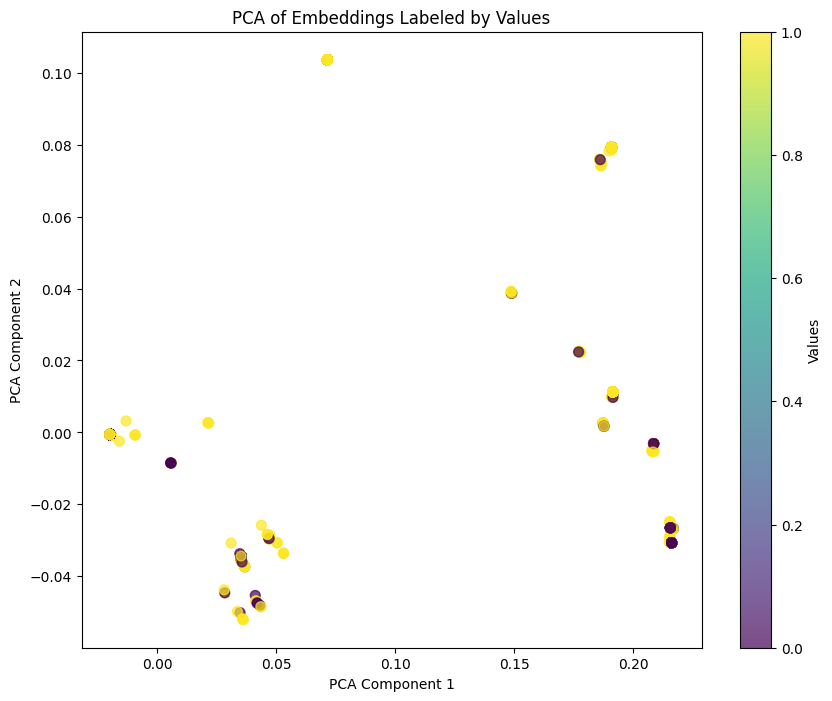

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(concatenated_array)

# Plot the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Values')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Embeddings Labeled by Values')
plt.show()